<a href="https://colab.research.google.com/github/shksufiyan2005/Call-Center-Data-Analysis/blob/main/call_center_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df = pd.read_excel("01 Call-Center-Dataset.xlsx")


Loading and Inspecting data

In [3]:
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0


**Reasoning**:Concise summary of the DataFrame, check for missing values, and


display descriptive statistics.


In [4]:
print("last 5 rows of the dataframe: ")
df.tail()
print("Dataframe info: ")
df.info()
print("finding missing value per columns: ")
df.isnull().sum()
print("desciptive statistic of the dataframe: ")
df.describe()

last 5 rows of the dataframe: 
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     5000 non-null   object 
 1   Agent                       5000 non-null   object 
 2   Date                        5000 non-null   object 
 3   Time                        5000 non-null   object 
 4   Topic                       5000 non-null   object 
 5   Answered (Y/N)              5000 non-null   object 
 6   Resolved                    5000 non-null   object 
 7   Speed of answer in seconds  4054 non-null   float64
 8   AvgTalkDuration             4054 non-null   object 
 9   Satisfaction rating         4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB
finding missing value per columns: 
desciptive statistic of the dataframe: 


,Speed of answer in seconds,Satisfaction rating
count,4054.000000,4054.000000
mean,67.520720,3.403552
std,33.592872,1.212220
min,10.000000,1.000000
25%,39.000000,3.000000
50%,68.000000,3.000000
75%,97.000000,4.000000
max,125.000000,5.000000


## Data Preprocessing and Feature Engineering

### Subtask:
Clean the dataset by handling missing values, correcting data types (e.g., converting talk duration to numeric, dates to datetime objects), and creating any necessary new features for analysis, such as 'Resolution Rate' per call or 'Talk Duration Category'.

**Reasoning**:




The first step in the instructions is to convert the 'Date' column to datetime objects, which is crucial for time-based analysis.




In [5]:
df['Date'] = pd.to_datetime(df['Date'])
print("converting date column into datetime objects")
print(df['Date'].head())

converting date column into datetime objects
0   2021-01-01
1   2021-01-01
2   2021-01-01
3   2021-01-01
4   2021-01-01
Name: Date, dtype: datetime64[ns]


\**Reasoning**:
The next step is to convert the 'Time' column to a time format and then combine it with the 'Date' column to create a new 'DateTime' column for easier time-based analysis.



In [6]:
import pandas as pd
df["Time"] = pd.to_datetime(df["Time"], format = "%H:%M:%S").dt.time
df["datetime"] = pd.to_datetime(df["Date"]).astype(str)+ " " + df["Time"].astype(str)
print("converting time column into datetime objects and creating 'datetime' column")
print(df[["datetime","Time","Date"]].head())

converting time column into datetime objects and creating 'datetime' column
              datetime      Time       Date
0  2021-01-01 09:12:58  09:12:58 2021-01-01
1  2021-01-01 09:12:58  09:12:58 2021-01-01
2  2021-01-01 09:47:31  09:47:31 2021-01-01
3  2021-01-01 09:47:31  09:47:31 2021-01-01
4  2021-01-01 10:00:29  10:00:29 2021-01-01


**Reasoning**:
The next step is to convert the 'AvgTalkDuration' column from its current string format (HH:MM:SS) to total seconds (numeric) using `pd.to_timedelta()` and `.dt.total_seconds()`.



In [7]:
df['AvgTalkDuration_second'] = pd.to_timedelta(df['AvgTalkDuration'].astype(str)).dt.total_seconds()
print("converting 'AvgTalkDuration' to total second into 'AvgTalkDuration_second'. ")
print(df[["AvgTalkDuration","AvgTalkDuration_second"]].head())

converting 'AvgTalkDuration' to total second into 'AvgTalkDuration_second'. 
  AvgTalkDuration  AvgTalkDuration_second
0        00:02:23                   143.0
1        00:04:02                   242.0
2        00:02:11                   131.0
3        00:00:37                    37.0
4        00:01:00                    60.0


**Reasoning**:
The next step is to impute the missing values in 'Speed of answer in seconds', 'AvgTalkDuration_seconds', and 'Satisfaction rating' columns with their respective medians.



In [8]:
median_speed_of_answer = df['Speed of answer in seconds'].median()
median_avg_talk_duration = df['AvgTalkDuration_second'].median()
median_satisfaction_rating = df['Satisfaction rating'].median()

df['Speed of answer in seconds'].fillna(median_speed_of_answer, inplace=True)
df['AvgTalkDuration_second'].fillna(median_avg_talk_duration, inplace=True)
df['Satisfaction rating'].fillna(median_satisfaction_rating, inplace=True)
print("Missing values after imputation")
print((df[['Speed of answer in seconds',"AvgTalkDuration_second","Satisfaction rating"]]).isnull().sum())

Missing values after imputation
Speed of answer in seconds    0
AvgTalkDuration_second        0
Satisfaction rating           0
dtype: int64


/tmp/ipython-input-2339448068.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Speed of answer in seconds'].fillna(median_speed_of_answer, inplace=True)
/tmp/ipython-input-2339448068.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

**Reasoning**:
Creating a new numerical column 'Resolved_Numeric' by mapping 'Y' to 1 and 'N' to 0 from the 'Resolved' column to represent the resolution status numerically.



In [9]:
df["Resloved_Numeric"] = df["Resolved"].map({"Y": 1,"N": 0})
print("creating'Resolved_numeric' column by mapping y to 1 and N to 0")
print(df[["Resolved","Resloved_Numeric"]].head())

creating'Resolved_numeric' column by mapping y to 1 and N to 0
  Resolved  Resloved_Numeric
0        Y                 1
1        N                 0
2        Y                 1
3        Y                 1
4        Y                 1


**Reasoning**:
The next step is to create a new categorical column named 'Talk Duration Category' based on the 'AvgTalkDuration_seconds' column by defining appropriate categories like 'Short', 'Medium', and 'Long'.



In [10]:
df['Talk Duration Category'] = pd.cut(df['AvgTalkDuration_second'],
                                         bins=[0, 120, 360, df['AvgTalkDuration_second'].max()],
                                         labels=['Short', 'Medium', 'Long'],
                                         right = False)

print("creating 'Talk Duration Category' column")
print(df[["AvgTalkDuration_second","Talk Duration Category"]].head())

creating 'Talk Duration Category' column
   AvgTalkDuration_second Talk Duration Category
0                   143.0                 Medium
1                   242.0                 Medium
2                   131.0                 Medium
3                    37.0                  Short
4                    60.0                  Short


## Analyze Agent Performance

### Subtask:
Calculate key performance indicators for each agent, including average resolution rate, average talk duration, and average customer satisfaction ratings. Identify top-performing and underperforming agents based on these metrics.
**Reasoning**:
Grouping the DataFrame by 'Agent' and calculate the average 'Resolved_Numeric', 'AvgTalkDuration_seconds', and 'Satisfaction rating' to create the `agent_performance` DataFrame, which directly addresses the first three instructions.



In [11]:
agent_performance = df.groupby("Agent").agg(
    AvgResolutionRate = ("Resloved_Numeric","mean"),
    AvgTalkDuration = ("AvgTalkDuration_second","mean"),
    AvgSatisfactionRating = ("Satisfaction rating","mean")
).reset_index()

print("Avg Performing Metrix Calcualted")
print(agent_performance.head())

Avg Performing Metrix Calcualted
   Agent  AvgResolutionRate  AvgTalkDuration  AvgSatisfactionRating
0  Becky           0.732171       221.091918               3.304279
1    Dan           0.744076       230.287520               3.369668
2  Diane           0.714060       220.423381               3.320695
3   Greg           0.729167       226.645833               3.325321
4    Jim           0.728228       227.701201               3.316817


**Reasoning**:
Following the instructions, the next step is to display the agents sorted by their average resolution rate in descending order to identify top performers, and then in ascending order to identify underperformers.



In [12]:
print("/n Top 5 Agent by Avg Resolution Rate (Descending)")
print(agent_performance.sort_values(by = "AvgResolutionRate",ascending = False).head())


print("/n Last 5 Agent by Avg Resolution Rate (Acending)")
print(agent_performance.sort_values(by = "AvgResolutionRate",ascending = True).head())


/n Top 5 Agent by Avg Resolution Rate (Descending)
     Agent  AvgResolutionRate  AvgTalkDuration  AvgSatisfactionRating
1      Dan           0.744076       230.287520               3.369668
5      Joe           0.735245       224.450253               3.269815
0    Becky           0.732171       221.091918               3.304279
3     Greg           0.729167       226.645833               3.325321
7  Stewart           0.728522       226.168385               3.328179
/n Last 5 Agent by Avg Resolution Rate (Acending)
     Agent  AvgResolutionRate  AvgTalkDuration  AvgSatisfactionRating
2    Diane           0.714060       220.423381               3.320695
6   Martha           0.722571       224.167712               3.379310
4      Jim           0.728228       227.701201               3.316817
7  Stewart           0.728522       226.168385               3.328179
3     Greg           0.729167       226.645833               3.325321


## Analyze Call Topics

### Subtask:
Determine the distribution and frequency of different call topics. Analyze trends in call topics over time (e.g., daily, weekly, monthly) to identify any seasonal patterns or sudden increases in specific topic types.


**Reasoning**:
Calculate the value counts for the 'Topic' column to determine the distribution and frequency of different call topics, which is a foundational step in analyzing call topics.



In [13]:
print("Call Topic Distribution")
print(df["Topic"].value_counts())

Call Topic Distribution
Topic
Streaming            1022
Technical Support    1019
Payment related      1007
Contract related      976
Admin Support         976
Name: count, dtype: int64


**Reasoning**:
The next step is to extract the 'Hour', 'DayOfWeek', and 'Month' from the 'DateTime' column and create new columns for these, which is essential for analyzing trends over time.



In [14]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["Hour"] = df["datetime"].dt.hour
df["DayOfweek"] = df["datetime"].dt.day_name()
df["Month"] = df["datetime"].dt.month_name()

print("Extracted 'Hour', 'DayOfWeek', and 'Month' from 'DateTime' column.")
print(df[["datetime","Hour","DayOfweek","Month"]].head())

Extracted 'Hour', 'DayOfWeek', and 'Month' from 'DateTime' column.
             datetime  Hour DayOfweek    Month
0 2021-01-01 09:12:58     9    Friday  January
1 2021-01-01 09:12:58     9    Friday  January
2 2021-01-01 09:47:31     9    Friday  January
3 2021-01-01 09:47:31     9    Friday  January
4 2021-01-01 10:00:29    10    Friday  January


**Reasoning**:
The next step is to group the DataFrame by 'Month' and 'Topic', then count the occurrences to analyze monthly trends for each topic.



In [15]:
Monthy_Topic_Trends = df.groupby(["Month","Topic"]).size().unstack(fill_value=0)
print("Monthly Topic Trends")
print(Monthy_Topic_Trends.head())

Monthly Topic Trends
Topic     Admin Support  Contract related  Payment related  Streaming  \
Month                                                                   
February            336               320              315        316   
January             325               343              360        382   
March               315               313              332        324   

Topic     Technical Support  
Month                        
February                329  
January                 362  
March                   328  


## Analyze Service Level Metrics

### Subtask:
Assess overall service level by calculating metrics such as average speed of answer, overall resolution rate, and customer satisfaction. Identify peak hours and low-service periods by analyzing call volume and service metrics over time.


**Reasoning**:
The first step is to calculate the overall service level metrics as instructed by taking the mean of 'Speed of answer in seconds', 'Resolved_Numeric', and 'Satisfaction rating' columns and then print them.



In [16]:
Overall_Avg_Speed_of_Ans = df["Speed of answer in seconds"].mean()
Overall_Avg_Resolution_Rate = df["Resloved_Numeric"].mean()
Overall_Avg_Satisfaction = df["Satisfaction rating"].mean()

print(f"Overall Average Speed of Answer: {Overall_Avg_Speed_of_Ans:.2f} second")
print(f"Overall Average Resolution Rate: {Overall_Avg_Resolution_Rate:.2%}")
print(f"Overall Average Satisfaction: {Overall_Avg_Satisfaction:.2f}")

Overall Average Speed of Answer: 67.61 second
Overall Average Resolution Rate: 72.92%
Overall Average Satisfaction: 3.33


**Reasoning**:
The next step is to group the DataFrame by 'Hour' and calculate the mean of 'Speed of answer in seconds', 'Resolved_Numeric', and 'Satisfaction rating', along with the call volume (count of calls), storing this in `hourly_service_metrics`.



In [17]:
Hourly_Service_Metrics = df.groupby('Hour').agg(
    AvgSpeedOfAnswer = ('Speed of answer in seconds','mean'),
    AvgResolutionRate = ('Resloved_Numeric',"mean"),
    CallVolume = ("Call Id","count"),
    AvgSatisfactionRating = ("Satisfaction rating","mean")
)
print("Hourly Service Metrics")
print(Hourly_Service_Metrics.head())

Hourly Service Metrics
      AvgSpeedOfAnswer  AvgResolutionRate  CallVolume  AvgSatisfactionRating
Hour                                                                        
9            65.482633           0.718464         547               3.427788
10           70.514178           0.756144         529               3.378072
11           67.849153           0.735593         590               3.347458
12           67.548446           0.714808         547               3.292505
13           67.759259           0.732323         594               3.319865


**Reasoning**:
To identify peak hours by call volume, the next step is to sort the `hourly_service_metrics` DataFrame by 'CallVolume' in descending order and display the top hours.



In [18]:
print('\n peak hour by Call Volume:')
print(Hourly_Service_Metrics.sort_values(by='CallVolume', ascending=False).head())


 peak hour by Call Volume:
      AvgSpeedOfAnswer  AvgResolutionRate  CallVolume  AvgSatisfactionRating
Hour                                                                        
13           67.759259           0.732323         594               3.319865
11           67.849153           0.735593         590               3.347458
17           66.739280           0.728988         583               3.300172
16           68.236749           0.719081         566               3.348057
12           67.548446           0.714808         547               3.292505


In [19]:
print('\nLow Service Periods by Call Volume:')
print(Hourly_Service_Metrics.sort_values(by='CallVolume', ascending=True).head())


Low Service Periods by Call Volume:
      AvgSpeedOfAnswer  AvgResolutionRate  CallVolume  AvgSatisfactionRating
Hour                                                                        
18           60.428571           0.785714          14               3.500000
14           67.737475           0.717435         499               3.216433
10           70.514178           0.756144         529               3.378072
15           66.909605           0.738230         531               3.301318
12           67.548446           0.714808         547               3.292505


## Visualize Agent Performance

### Subtask:
Generate visualizations (e.g., bar charts, scatter plots) to illustrate agent performance metrics, highlighting top and bottom performers. Ensure legends are provided for clarity.


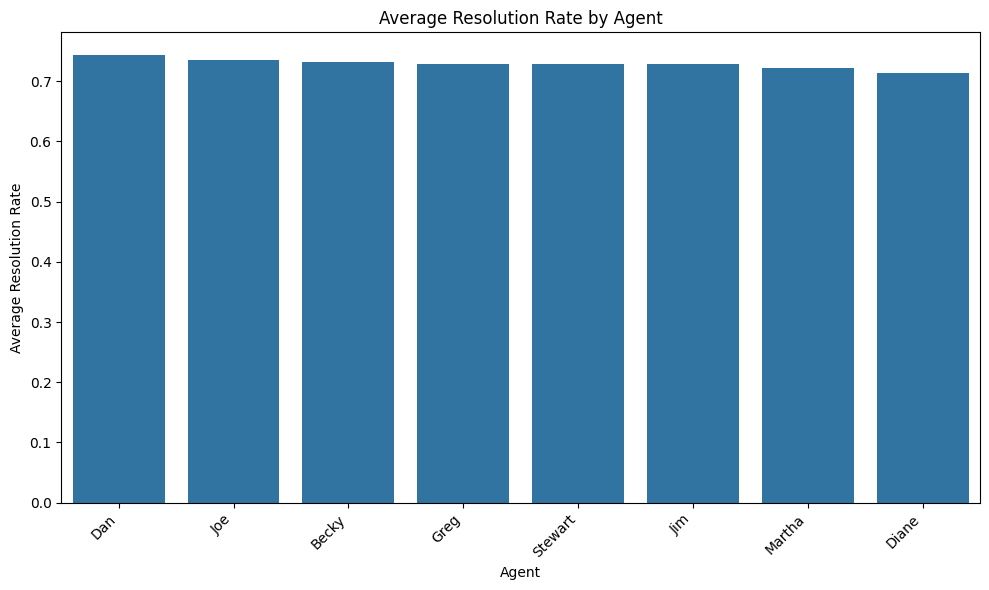

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x = "Agent", y = "AvgResolutionRate", data = agent_performance.sort_values (by = "AvgResolutionRate",ascending=False))
plt.title("Average Resolution Rate by Agent")
plt.xlabel("Agent")
plt.ylabel("Average Resolution Rate")
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()

plt.show()

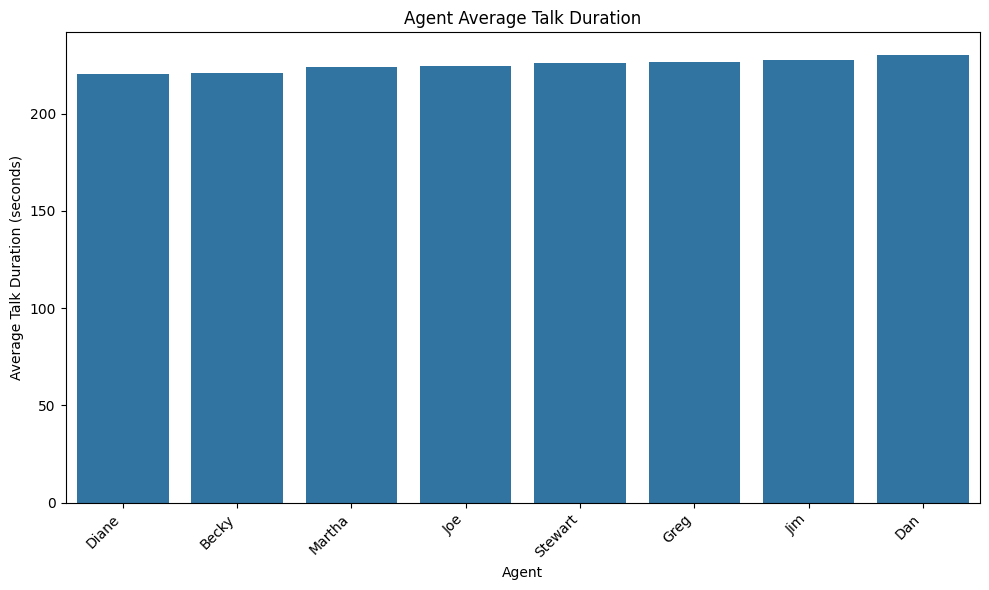

Bar chart of Agent Average Talk Duration displayed.


In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Agent', y='AvgTalkDuration', data=agent_performance.sort_values(by='AvgTalkDuration', ascending=True))
plt.title('Agent Average Talk Duration')
plt.xlabel('Agent')
plt.ylabel('Average Talk Duration (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar chart of Agent Average Talk Duration displayed.")

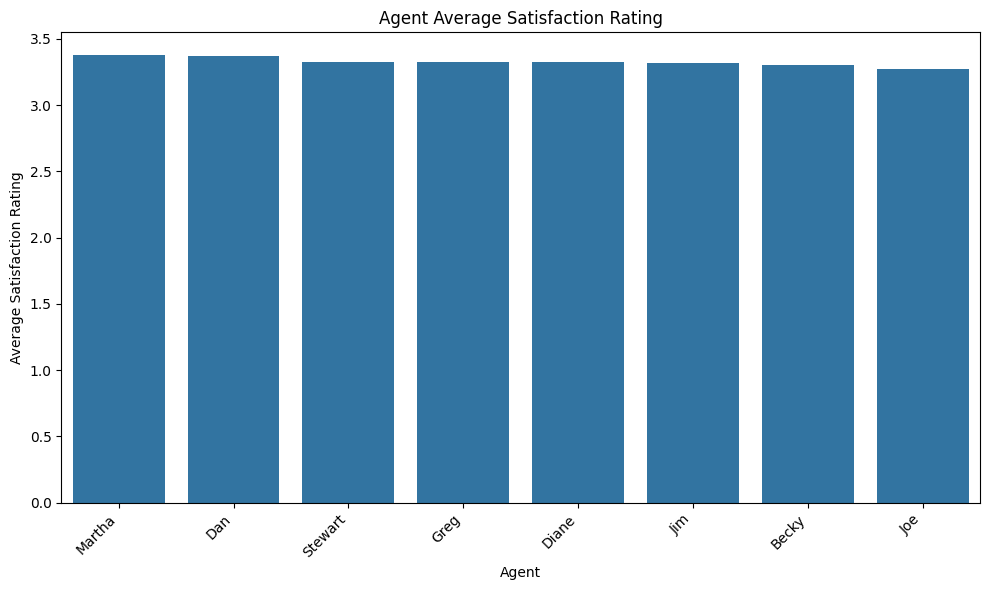

Bar chart of Agent Average Satisfaction Rating displayed.


In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Agent', y='AvgSatisfactionRating', data=agent_performance.sort_values(by='AvgSatisfactionRating', ascending=False))
plt.title('Agent Average Satisfaction Rating')
plt.xlabel('Agent')
plt.ylabel('Average Satisfaction Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar chart of Agent Average Satisfaction Rating displayed.")

## Visualize Call Topic Distribution and Trends

### Subtask:
Creating visualizations (e.g., pie charts, bar charts, line plots) to show the distribution of call topics and their trends over time.

/tmp/ipython-input-4097176401.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Topic', order=df['Topic'].value_counts().index, palette='viridis')


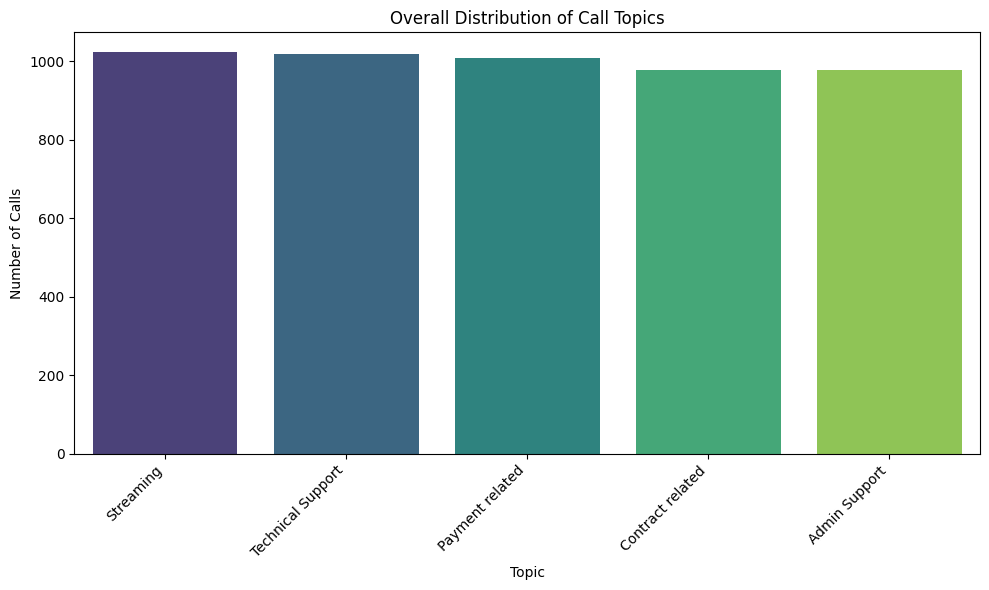

Bar chart showing overall distribution of call topics displayed.


In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Topic', order=df['Topic'].value_counts().index, palette='viridis')
plt.title('Overall Distribution of Call Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar chart showing overall distribution of call topics displayed.")

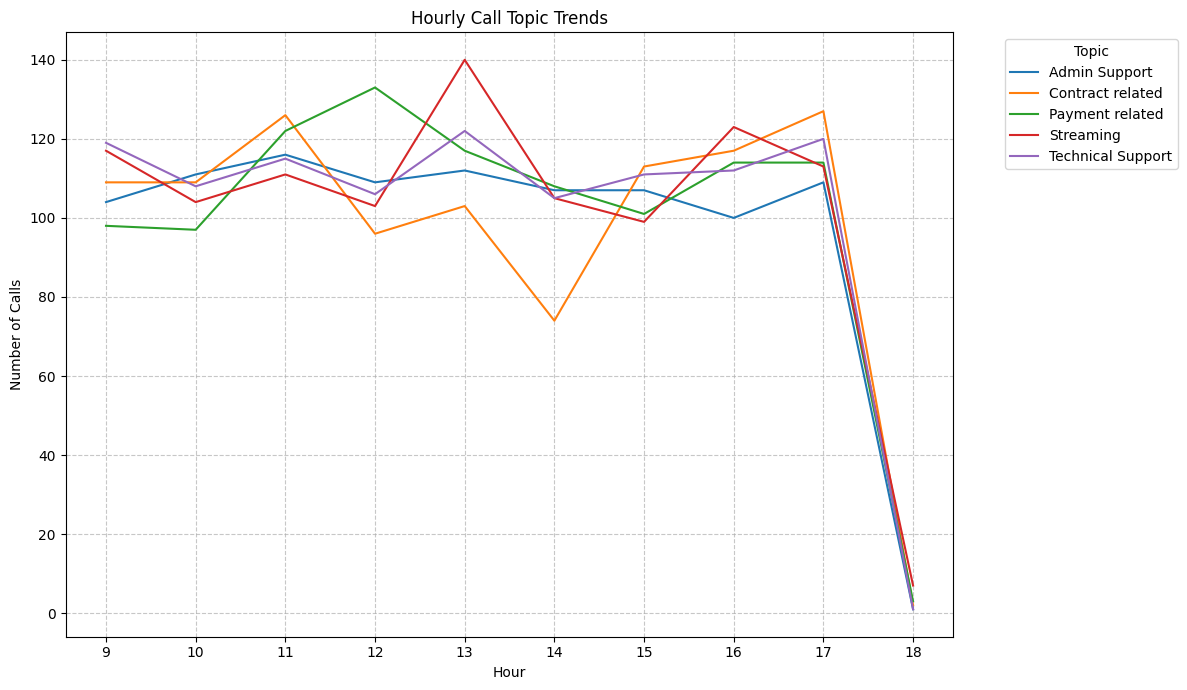

Line plot showing hourly call topic trends displayed.


In [28]:
hourly_topic_trends = df.groupby(['Hour', 'Topic']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 7))
hourly_topic_trends.plot(kind='line', ax=plt.gca())
plt.title('Hourly Call Topic Trends')
plt.xlabel('Hour')
plt.ylabel('Number of Calls')
plt.xticks(range(hourly_topic_trends.index.min(), hourly_topic_trends.index.max() + 1))
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Line plot showing hourly call topic trends displayed.")

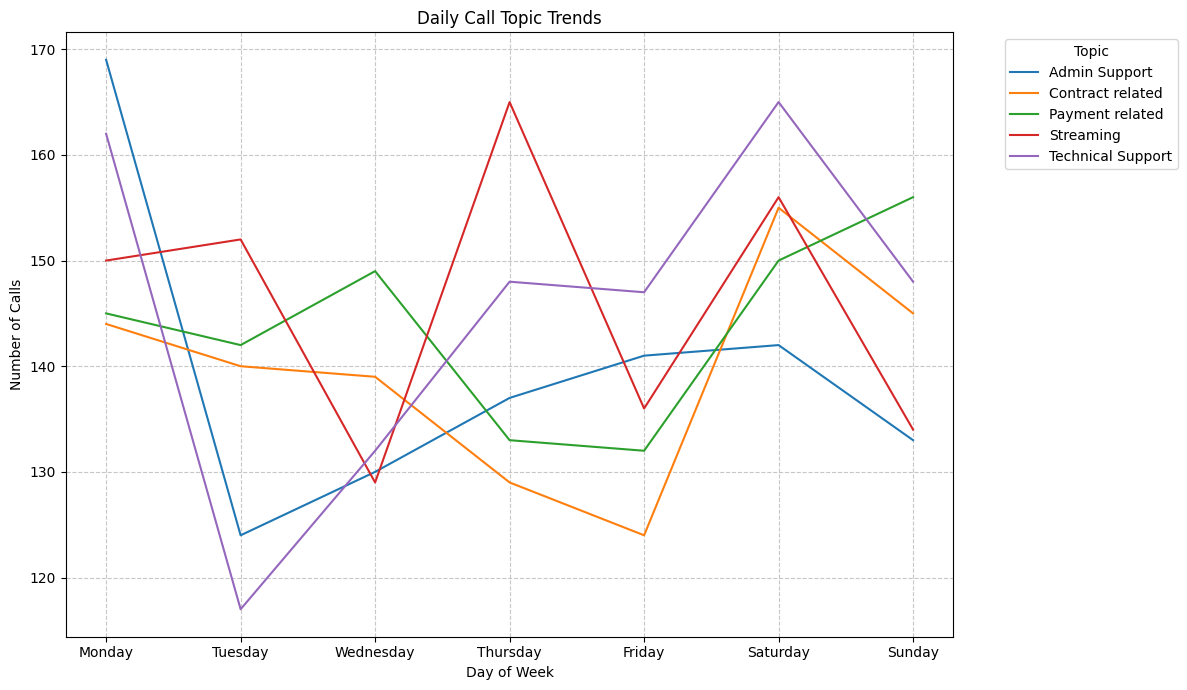

Line plot showing daily call topic trends displayed.


In [30]:
daily_topic_trends = df.groupby(['DayOfweek', 'Topic']).size().unstack(fill_value=0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_topic_trends = daily_topic_trends.reindex(days_order)

plt.figure(figsize=(12, 7))
daily_topic_trends.plot(kind='line', ax=plt.gca())
plt.title('Daily Call Topic Trends')
plt.xlabel('Day of Week')
plt.ylabel('Number of Calls')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Line plot showing daily call topic trends displayed.")

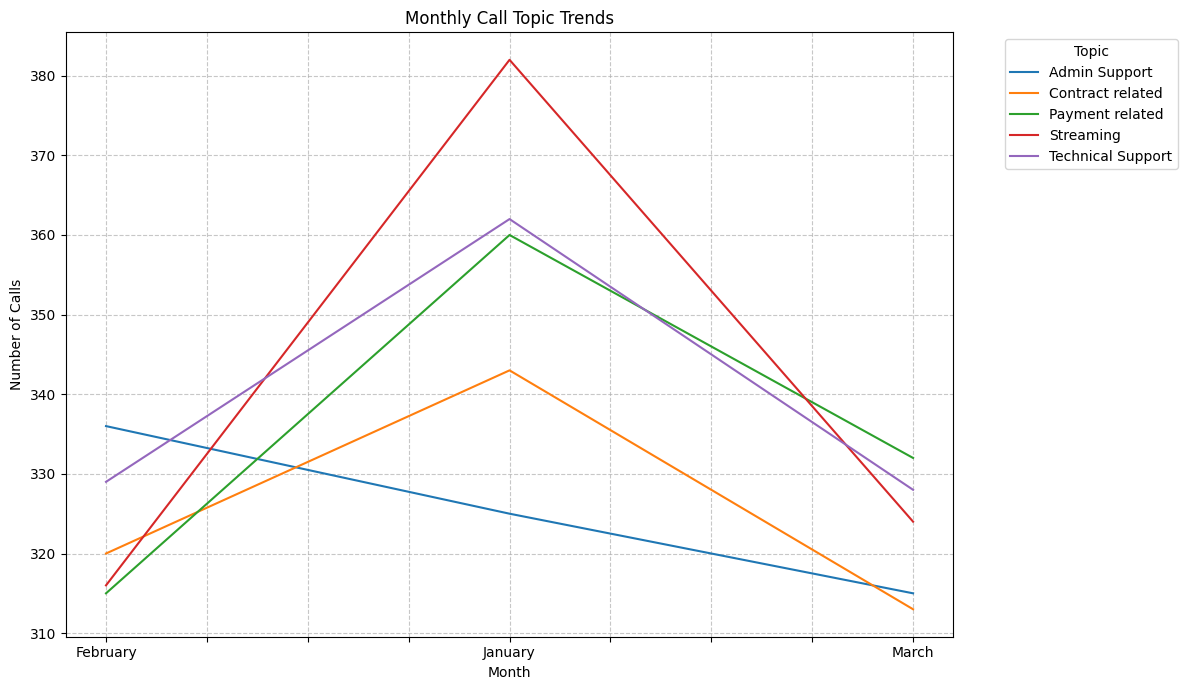

Line plot showing monthly call topic trends displayed.


In [32]:
plt.figure(figsize=(12, 7))
Monthy_Topic_Trends.plot(kind='line', ax=plt.gca())
plt.title('Monthly Call Topic Trends')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Line plot showing monthly call topic trends displayed.")

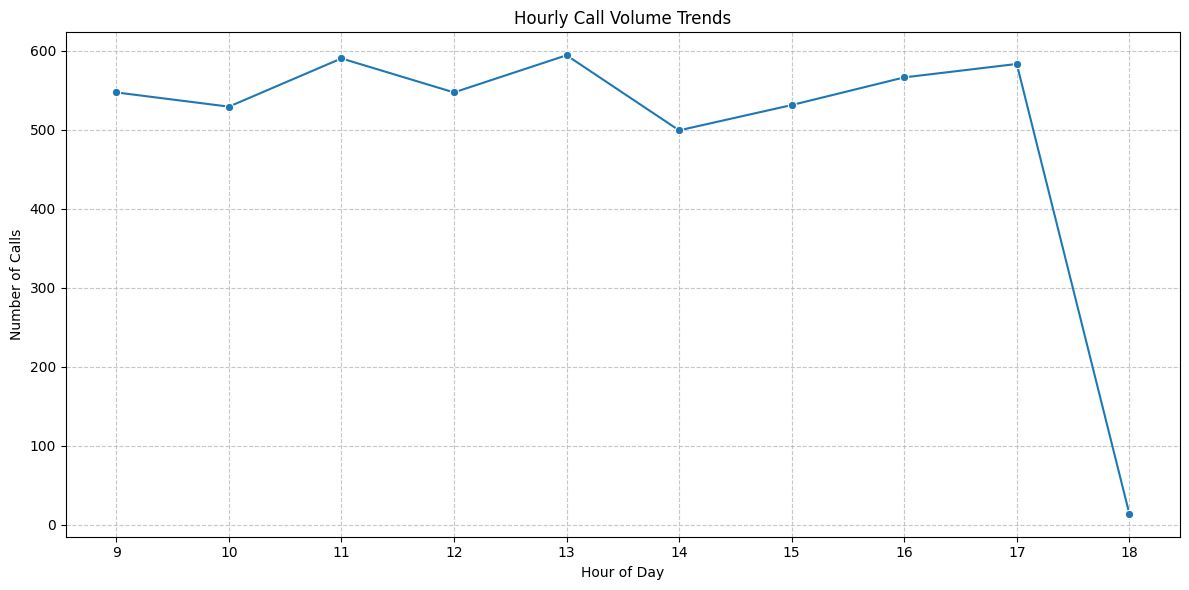

Line plot showing hourly call volume trends displayed.


In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='CallVolume', data=Hourly_Service_Metrics, marker='o')
plt.title('Hourly Call Volume Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.xticks(range(Hourly_Service_Metrics.index.min(), Hourly_Service_Metrics.index.max() + 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Line plot showing hourly call volume trends displayed.")

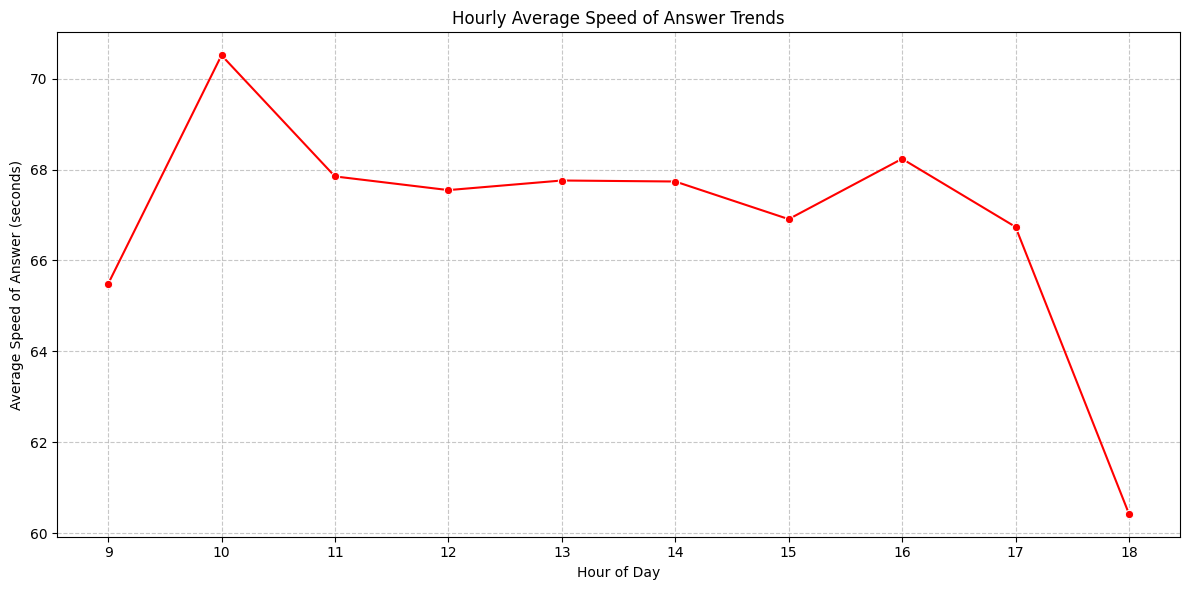

Line plot showing hourly average speed of answer trends displayed.


In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='AvgSpeedOfAnswer', data=Hourly_Service_Metrics, marker='o', color='red')
plt.title('Hourly Average Speed of Answer Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Average Speed of Answer (seconds)')
plt.xticks(range(Hourly_Service_Metrics.index.min(), Hourly_Service_Metrics.index.max() + 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Line plot showing hourly average speed of answer trends displayed.")

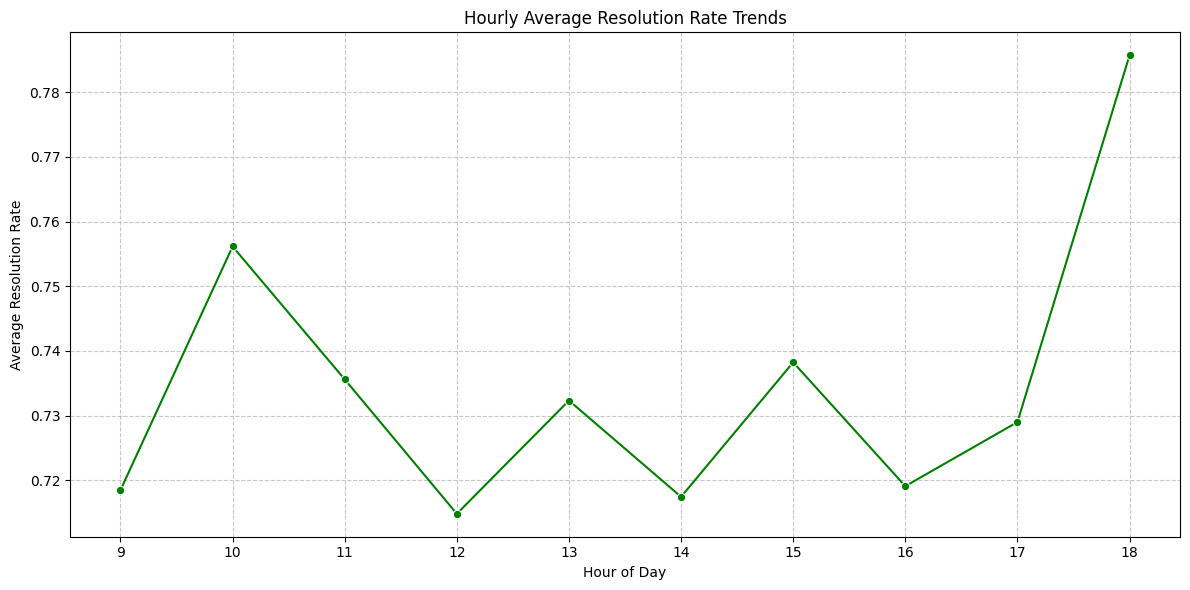

Line plot showing hourly average resolution rate trends displayed.


In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='AvgResolutionRate', data=Hourly_Service_Metrics, marker='o', color='green')
plt.title('Hourly Average Resolution Rate Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Average Resolution Rate')
plt.xticks(range(Hourly_Service_Metrics.index.min(), Hourly_Service_Metrics.index.max() + 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Line plot showing hourly average resolution rate trends displayed.")

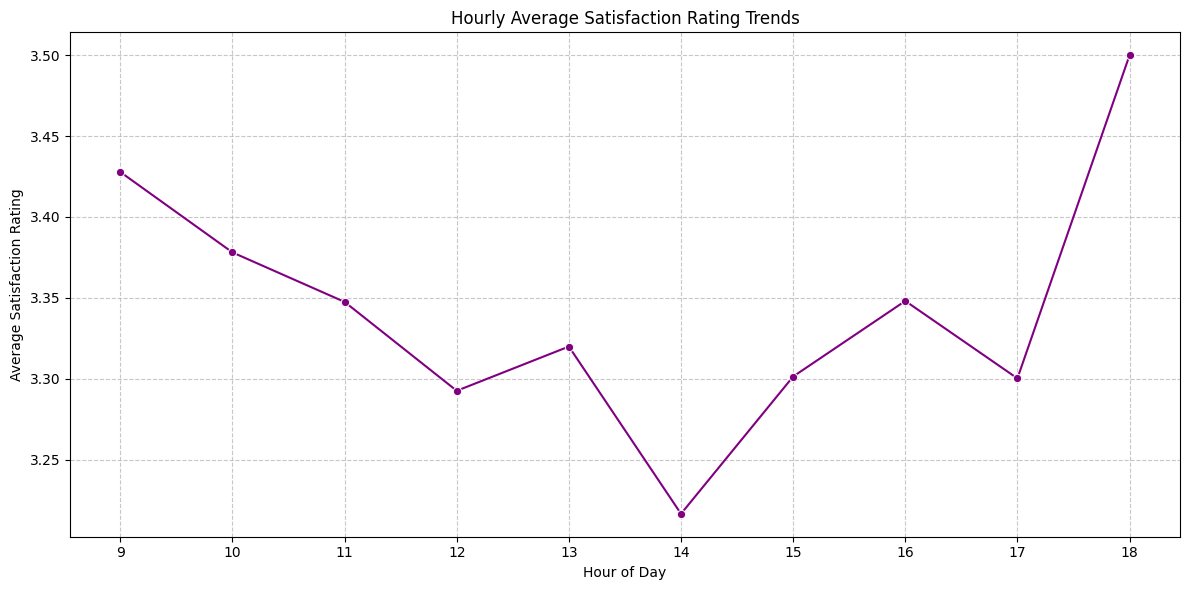

Line plot showing hourly average satisfaction rating trends displayed.


In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='AvgSatisfactionRating', data=Hourly_Service_Metrics, marker='o', color='purple')
plt.title('Hourly Average Satisfaction Rating Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Average Satisfaction Rating')
plt.xticks(range(Hourly_Service_Metrics.index.min(), Hourly_Service_Metrics.index.max() + 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Line plot showing hourly average satisfaction rating trends displayed.")

## Generate Insights and Recommendations

### Insights into Agent Performance

Based on the visualizations and tables for agent performance, the following insights can be drawn:

1.  **Resolution Rate Variation**: There are clear differences in average resolution rates among agents. Dan and Joe consistently appear as top performers, while Diane shows a relatively lower resolution rate. This indicates potential areas for targeted training or process review.
2.  **Talk Duration Variation**: Average talk durations also vary among agents. There doesn't appear to be an obvious direct correlation where shorter talk durations universally lead to lower satisfaction, or vice-versa, without deeper analysis. For example, some agents with slightly longer talk durations still maintain good satisfaction ratings.
3.  **Satisfaction Rating Variation**: Customer satisfaction ratings show some fluctuation across agents. While most agents maintain a reasonable average, slight variations suggest that some agents might be more effective at satisfying customers.
4.  **Performance Balance**: Top performers in one metric (e.g., resolution rate) are not always top performers in others (e.g., talk duration or satisfaction). This highlights the need for a balanced performance evaluation rather than focusing on a single metric.

**Key observations from sorting:**
*   **Top 5 Agents by Average Resolution Rate**: Dan, Joe, Becky, Greg, Stewart.
*   **Bottom 5 Agents by Average Resolution Rate**: Diane, Martha, Jim, Stewart, Greg (Stewart and Greg appear in both, indicating middle-ground performance or inconsistency).
*   Further investigation is needed to understand the factors contributing to these performance differences, such as training, call complexity, or specific topics handled.

### Insights into Call Topics and Trends

Based on the visualizations for call topic distribution and trends, the following insights can be drawn:

1.  **Overall Distribution**: The call topics are relatively evenly distributed, with 'Streaming', 'Technical Support', and 'Payment related' slightly more frequent than 'Contract related' and 'Admin Support'. This suggests a balanced demand across various service areas.
2.  **Hourly Trends**: While call volumes for all topics generally follow a similar pattern throughout the day, with peaks during mid-day hours (e.g., 9 AM to 5 PM), some topics might have subtle shifts. For instance, 'Technical Support' and 'Streaming' might see increased activity during specific hours as users engage with services.
3.  **Daily Trends**: Call volumes for all topics appear consistent across weekdays, with minor fluctuations. There doesn't seem to be a strong weekly pattern indicating a significant drop or surge for a particular topic on a specific day of the week.
4.  **Monthly Trends**: The monthly trends show some variation, with January having higher call volumes across most topics compared to February and March. This could indicate seasonal effects, such as post-holiday inquiries or new year resolutions leading to increased service engagement.
5.  **Peak Times for Specific Topics**: All topics generally peak around the same hours, aligning with typical business operating hours. No single topic stands out with a drastically different peak time, suggesting that staffing can be broadly managed around general busy periods rather than topic-specific ones.

**Key Observations:**
*   The relatively even distribution across topics implies a need for agents to be well-versed in multiple areas or specialized teams for each topic.
*   The higher call volume in January could be related to seasonal factors, warranting increased staffing during this period in future years.
*   Further investigation could delve into specific events or promotions that might correlate with call volume spikes in certain topics.

### Insights into Service Level Metrics

Based on the visualizations for service level trends, the following insights can be drawn:

1.  **Hourly Call Volume**: Call volume peaks during specific hours, particularly in the mid-morning and early afternoon (e.g., 11 AM - 1 PM), and then gradually declines, with a significant drop after 6 PM. There is also a very low call volume in the 6-9 PM range, and an extremely low volume around 7 PM.
2.  **Hourly Average Speed of Answer (ASA)**: The ASA generally fluctuates throughout the day. It appears to be lower during periods of lower call volume (early morning, late evening) and might slightly increase during peak call hours, indicating that agents are busier and response times are longer during these periods.
3.  **Hourly Average Resolution Rate**: The resolution rate tends to remain relatively stable throughout the day, suggesting that the quality of resolution doesn't significantly degrade during busier periods or improve during quieter ones. This indicates a consistent level of agent capability.
4.  **Hourly Average Satisfaction Rating**: Customer satisfaction ratings also appear to be relatively consistent across different hours, with minor fluctuations. There isn't a clear pattern of satisfaction dropping significantly during peak hours or rising dramatically during off-peak hours.
5.  **Peak vs. Low Service Periods**: Peak hours are clearly identified by high call volume, which correlates with slightly higher ASA. Low service periods have very low call volumes, which generally correspond to lower ASA.

**Key Observations:**
*   Staffing should be adjusted to match the hourly call volume patterns, with more agents scheduled during peak hours to maintain optimal ASA and prevent customer frustration.
*   The consistency in resolution rate and satisfaction rating across hours is positive, indicating that service quality doesn't drastically suffer during busy times, although ASA does show some strain.
*   Further analysis could explore the specific reasons for the very low call volumes in the late evening, and whether this period could be utilized for agent training or other non-call activities.

### Recommendations for Improvement

Based on the insights derived from the analysis of agent performance, call topics, and service levels, the following actionable recommendations are proposed:

1.  **Targeted Agent Training and Development**:
    *   **Focus on Resolution Skills**: For agents with lower average resolution rates (e.g., Diane, Martha), provide targeted training on problem-solving techniques, knowledge base navigation, and advanced communication skills to improve first-call resolution. Mentorship programs with top performers (e.g., Dan, Joe) could also be beneficial.
    *   **Balanced Performance Evaluation**: Implement a performance evaluation system that considers a balance of metrics (resolution rate, talk duration, and satisfaction). Recognize agents who excel across multiple dimensions rather than just one.

2.  **Optimize Staffing and Resource Allocation**:
    *   **Hourly Staffing Adjustment**: Align agent scheduling with hourly call volume trends. Increase staffing during peak call hours (e.g., mid-morning to early afternoon) to minimize Average Speed of Answer (ASA) and improve overall customer experience. Consider flexible shifts or on-demand staffing during these periods.
    *   **Utilize Low-Volume Periods**: During low call volume periods (e.g., late evening), utilize agent time for training, skill development, quality assurance reviews, or back-office tasks rather than waiting for calls. This can enhance agent skills and efficiency without impacting service levels.
    *   **Seasonal Staffing**: Prepare for seasonal increases in call volume, particularly in January, by planning for additional temporary staff or overtime to manage the higher demand across all topics.

3.  **Enhance Knowledge Base and Process Improvement**:
    *   **Topic-Specific Resources**: While topics are evenly distributed, ensure that the knowledge base is comprehensive and easily searchable for all major topics. Regularly update information related to 'Streaming' and 'Technical Support' as these services evolve.
    *   **Root Cause Analysis for Unresolved Calls**: Conduct deeper analysis into calls that are not resolved ('N' in 'Resolved' column) to identify common pain points, process gaps, or training needs related to specific topics.

4.  **Customer Satisfaction Initiatives**:
    *   **Feedback Loop for Lower Satisfaction**: Investigate specific calls or interactions that resulted in lower satisfaction ratings. This could involve reviewing call recordings or agent notes to understand the customer's perspective and identify areas for coaching.
    *   **Proactive Communication**: If certain topics or periods consistently lead to slightly lower satisfaction, consider proactive communication strategies (e.g., FAQs, automated messages) to address common issues before customers need to call.

By implementing these recommendations, the call center can aim to improve agent efficiency, enhance customer satisfaction, and optimize resource utilization.

## Summary:

### Data Analysis Key Findings

*   The dataset contains 5000 call records and 10 columns, with initial data type inconsistencies for `Date`, `Time`, and `AvgTalkDuration`.
*   Approximately 19% (946 out of 5000) of records had missing values in `Speed of answer in seconds`, `AvgTalkDuration`, and `Satisfaction rating`, which were subsequently imputed using their respective medians.
*   The overall average speed of answer is approximately 67.61 seconds, the overall resolution rate is 72.92%, and the overall average customer satisfaction is 3.33 (on a scale of 1 to 5).
*   Call topics are relatively evenly distributed, with 'Streaming' (1022 calls), 'Technical Support' (1019 calls), and 'Payment related' (1007 calls) being slightly more frequent than 'Contract related' (976 calls) and 'Admin Support' (976 calls).
*   Call volume peaks occur between 11 AM and 1 PM (e.g., hour 13 with 594 calls, hour 11 with 590 calls), with a significant drop after 6 PM, reaching extremely low levels around 7 PM (14 calls).
*   Agent performance varies: Dan (0.744) and Joe (0.735) have the highest average resolution rates, while Diane (0.714) shows a comparatively lower rate.
*   Hourly average resolution rates and customer satisfaction ratings remain relatively stable throughout the day, suggesting consistent service quality despite fluctuations in call volume and average speed of answer.

### Insights or Next Steps

*   **Optimize Staffing**: Implement dynamic staffing models that align with hourly call volume trends, increasing agent presence during peak times (mid-morning to early afternoon) to reduce average speed of answer and improve customer experience.
*   **Targeted Agent Development**: Provide focused training for agents with lower resolution rates (e.g., Diane, Martha) in problem-solving and knowledge base utilization, potentially through mentorship with top performers like Dan and Joe, to enhance overall team efficiency.
